# loading necessary moudules

In [12]:
%load_ext autoreload
%autoreload 2
from toolsets.ff_droup import process_mzml
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import toolsets.spectra_operations as so
from toolsets.msms_lib_curation import export_msp_simple_msp, library_curation, extract_features, complete_std_list
from toolsets.setup import set_workspace, get_dirs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# set up workspace

In [13]:
master_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica' # master directory: a place where you want all of your files in
set_workspace(master_dir)
mode = 'pos'
# this is the master workspace, all other directories will be created within this workspace
dirs =get_dirs(master_dir, mode=mode, if_print=False)
msms_lib_dir = dirs[-2]
mzml_dir = os.path.join(msms_lib_dir, 'mzml',mode)
features_dir = os.path.join(msms_lib_dir, 'features',mode)
# after this step please put all mzml files in correspoinding mzml folder

the workspace exists!
set up complete


In [41]:
msms_lib_dir

'/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/msms_lib'

In [40]:
mzml_dir

'/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/msms_lib/pos'

# Split pos/neg (optional)

In [38]:
from toolsets.file_io import split_pos_neg

In [61]:
split_pos_neg(all_folder=os.path.join(os.path.join(msms_lib_dir, 'mzml')))

/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/msms_lib/mzml


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/msms_lib/mzml/STD000591_P.mzML'

# extract features

In [64]:
extract_features(mzml_dir, features_dir)

100%|██████████| 43/43 [1:16:16<00:00, 106.43s/it]


# preparing standard lists

In [14]:
std_list_name = 'Myristica fragrans Data Summary - Summary.csv'# please provide std_list, placed in master_dir
std_list = pd.read_csv(os.path.join(msms_lib_dir, std_list_name))
# std_list_completed = complete_std_list(std_list, )

In [16]:
std_list

,BSD_ID,Name,CAS,Vendor ID,amount [mg],Analyticon plate ID,BSD PLate ID,position,purity [%],formula,molweight,NMR Filename,SMILES
0,STD002562,Galbacin,NaN,NP-012906,1,AD236549-01,STP000030,A01,99.0,C20H20O5,340.375,H2886BS.007,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1
1,STD002563,NP-012844,NaN,NP-012844,1,AD236549-01,STP000030,A02,96.0,C21H26O4,342.435,C2253IS.008,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1
2,STD002564,Fragransin A2,NaN,NP-011209,1,AD236549-01,STP000030,A03,70.0,C20H24O5,344.407,C3095AS.004,COC1=CC(=CC=C1O)C1OC(C(C)C1C)C1=CC(OC)=C(O)C=C1
3,STD002565,meso-Austrobailignan-5,NaN,NP-025341,1,AD236549-01,STP000030,A04,100.0,C20H22O4,326.392,H2966HS.010,CC(CC1=CC2=C(OCO2)C=C1)C(C)CC1=CC2=C(OCO2)C=C1
4,STD002566,Myristicin,607-91-0,NP-004154,1,AD236549-01,STP000030,A05,70.0,C11H12O3,192.214,C2909BS.001,COC1=CC(CC=C)=CC2=C1OCO2
5,STD002567,D-Prunasin,NaN,NP-024171,1,AD236549-01,STP000030,B01,94.0,C14H17NO6,295.291,H2807H04_NF2,OCC1OC(OC(C#N)C2=CC=CC=C2)C(O)C(O)C1O
6,STD002568,Rutin,153-18-4,NP-000211,1,AD236549-01,STP000030,B02,100.0,C27H30O16,610.521,H3194IS.002,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...
7,STD002569,(-)-Galbacin,NaN,NP-023852,1,AD236549-01,STP000030,B03,96.0,C20H20O5,340.375,H2886BS.008,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1
8,STD002570,Dihydrogualaretic acid,ng,NP-005429,1,AD236549-01,STP000030,B04,88.0,C20H26O4,330.424,C2253DS.010,COC1=CC(CC(C)C(C)CC2=CC(OC)=C(O)C=C2)=CC=C1O
9,STD002571,Macelignan,NaN,NP-007299,1,AD236549-01,STP000030,C01,100.0,C20H24O4,328.408,C2253IS.005,COC1=C(O)C=CC(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)=C1


In [19]:
std_list_completed = complete_std_list(std_list,adducts=['[M-H]-', '[M-H2O-H]-'], mode= 'neg')

In [20]:
std_list_completed

,BSD_ID,Name,CAS,Vendor ID,amount [mg],Analyticon plate ID,BSD PLate ID,position,purity [%],formula,molweight,NMR Filename,SMILES,[M-H]-,[M-H2O-H]-,mix
0,STD002562,Galbacin,NaN,NP-012906,1,AD236549-01,STP000030,A01,99.0,C20H20O5,340.375,H2886BS.007,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,339.123797,321.112684,STD002562_N
1,STD002563,NP-012844,NaN,NP-012844,1,AD236549-01,STP000030,A02,96.0,C21H26O4,342.435,C2253IS.008,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,341.175833,323.164719,STD002563_N
2,STD002564,Fragransin A2,NaN,NP-011209,1,AD236549-01,STP000030,A03,70.0,C20H24O5,344.407,C3095AS.004,COC1=CC(=CC=C1O)C1OC(C(C)C1C)C1=CC(OC)=C(O)C=C1,343.155097,325.143984,STD002564_N
3,STD002565,meso-Austrobailignan-5,NaN,NP-025341,1,AD236549-01,STP000030,A04,100.0,C20H22O4,326.392,H2966HS.010,CC(CC1=CC2=C(OCO2)C=C1)C(C)CC1=CC2=C(OCO2)C=C1,325.144533,307.133419,STD002565_N
4,STD002566,Myristicin,607-91-0,NP-004154,1,AD236549-01,STP000030,A05,70.0,C11H12O3,192.214,C2909BS.001,COC1=CC(CC=C)=CC2=C1OCO2,191.071368,173.060254,STD002566_N
5,STD002567,D-Prunasin,NaN,NP-024171,1,AD236549-01,STP000030,B01,94.0,C14H17NO6,295.291,H2807H04_NF2,OCC1OC(OC(C#N)C2=CC=CC=C2)C(O)C(O)C1O,294.098311,276.087197,STD002567_N
6,STD002568,Rutin,153-18-4,NP-000211,1,AD236549-01,STP000030,B02,100.0,C27H30O16,610.521,H3194IS.002,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,609.146108,591.134995,STD002568_N
7,STD002569,(-)-Galbacin,NaN,NP-023852,1,AD236549-01,STP000030,B03,96.0,C20H20O5,340.375,H2886BS.008,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,339.123797,321.112684,STD002569_N
8,STD002570,Dihydrogualaretic acid,ng,NP-005429,1,AD236549-01,STP000030,B04,88.0,C20H26O4,330.424,C2253DS.010,COC1=CC(CC(C)C(C)CC2=CC(OC)=C(O)C=C2)=CC=C1O,329.175833,311.164719,STD002570_N
9,STD002571,Macelignan,NaN,NP-007299,1,AD236549-01,STP000030,C01,100.0,C20H24O4,328.408,C2253IS.005,COC1=C(O)C=CC(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)=C1,327.160183,309.149069,STD002571_N


In [21]:

std_list_completed.to_csv(os.path.join(msms_lib_dir, 'curated_std_list_neg.csv'), index = False)

# matching features to standard lists

In [22]:
std_list_completed = pd.read_csv(os.path.join(msms_lib_dir, 'curated_std_list.csv'))

In [23]:
matched , missing_compound= library_curation(std_list_completed, features_dir)

100%|██████████| 37/37 [00:04<00:00,  9.22it/s]


In [24]:
missing_compound

['Dihydrogualaretic acid', 'Guaiacin', 'Protocatechuic acid', 'Gallic acid']

In [6]:
matched

,reference_name,reference_smiles,reference_adduct,reference_mix,reference_precursor_mz,ms_level,precursor_mz,charge,rt,peaks,mix,base_name,rt_offset,rt_start,rt_end,peak_apex_intensity,peak_range_idx,ms2_range_idx,pmz_bin
0,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M+K]+,STD002562,379.094232,2,379.094574,1,6.722416,101.90892\t0.03787441\n103.489098\t0.03613222\...,STD002562_P.mzML,STD002562_P.mzML,0.046721,6.680714,6.858130,2.408010e+06,"[380, 382, 390]",[1917],379.094635
1,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M+Na]+,STD002562,363.120292,2,363.121338,1,6.728338,104.502594\t0.07617328\n119.619797\t0.0811236\...,STD002562_P.mzML,STD002562_P.mzML,0.045141,6.680714,6.876420,1.686582e+06,"[380, 383, 391]",[1918],363.120850
2,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M-H2O+H]+,STD002562,323.127786,2,323.127912,1,6.728843,84.188889\t2.114e-05\n89.039825\t2.627e-05\n91...,STD002562_P.mzML,STD002562_P.mzML,0.004239,6.645628,7.326875,3.859060e+08,"[378, 383, 416]","[1896, 1905, 1929, 1951, 1971, 1990, 2005, 202...",323.127869
3,NP-012844,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,[M+Na]+,STD002563,365.172327,2,365.172449,1,7.169752,102.363533\t0.00208444\n107.544121\t0.00224972...,STD002563_P.mzML,STD002563_P.mzML,0.007773,7.115381,7.330606,1.190515e+07,"[405, 408, 417]","[2024, 2044]",365.172058
4,NP-012844,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,[M+H]+,STD002563,343.190386,2,343.189423,1,7.171482,95.070511\t0.0017676\n123.044044\t0.00231149\n...,STD002563_P.mzML,STD002563_P.mzML,0.053833,7.095521,7.438997,9.895780e+06,"[404, 408, 423]",[2038],343.189545
5,Fragransin A2,COC1=CC(=CC=C1O)C1OC(C(C)C1C)C1=CC(OC)=C(O)C=C1,[M+H]+,STD002564,345.169650,2,345.169430,1,5.228888,91.752991\t1.36e-06\n92.020859\t1.684e-05\n94....,STD002564_P.mzML,STD002564_P.mzML,0.024569,5.054309,5.490050,6.946631e+07,"[288, 298, 312]","[1470, 1490, 1512, 1534]",345.169220
6,meso-Austrobailignan-5,CC(CC1=CC2=C(OCO2)C=C1)C(C)CC1=CC2=C(OCO2)C=C1,[M-H2O+H]+,STD002565,309.148521,2,309.148590,1,7.440730,135.044525\t0.07410256\n148.925125\t0.06076478...,STD002565_P.mzML,STD002565_P.mzML,0.065766,7.382602,7.602973,1.355412e+06,"[421, 424, 433]",[2118],309.148499
7,Myristicin,COC1=CC(CC=C)=CC2=C1OCO2,[M+H]+,STD002566,193.085921,2,193.085983,1,5.937882,49.934795\t0.00069079\n63.558453\t0.00067249\n...,STD002566_P.mzML,STD002566_P.mzML,0.009940,5.774689,5.987271,2.084266e+07,"[329, 338, 341]",[1672],193.086014
8,D-Prunasin,OCC1OC(OC(C#N)C2=CC=CC=C2)C(O)C(O)C1O,[M+Na]+,STD002567,318.094805,2,318.094777,1,2.761851,90.875595\t0.00132279\n93.014694\t0.00029923\n...,STD002567_P.mzML,STD002567_P.mzML,0.042105,2.450184,2.936986,8.292358e+06,"[140, 157, 167]","[732, 751, 770, 790, 809]",318.094757
9,Rutin,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,[M+Na]+,STD002568,633.142603,2,633.142674,1,2.904095,172.275635\t0.00016081\n172.808578\t0.00186646...,STD002568_P.mzML,STD002568_P.mzML,0.003811,2.638014,3.324753,4.910394e+06,"[151, 166, 190]","[789, 810, 834, 858, 882, 899]",633.142761


In [139]:
missing_compound

['Gallic acid', 'Protocatechuic acid', 'Dihydrogualaretic acid', 'Guaiacin']

In [25]:
matched

,reference_name,reference_smiles,reference_adduct,reference_mix,reference_precursor_mz,ms_level,precursor_mz,charge,rt,peaks,mix,base_name,rt_offset,rt_start,rt_end,peak_apex_intensity,peak_range_idx,ms2_range_idx,pmz_bin
0,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M+K]+,STD002562,379.094232,2,379.094574,1,6.722416,101.90892\t0.03787441\n103.489098\t0.03613222\...,STD002562_P.mzML,STD002562_P.mzML,0.046721,6.680714,6.858130,2.408010e+06,"[380, 382, 390]",[1917],379.094635
1,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M+Na]+,STD002562,363.120292,2,363.121338,1,6.728338,104.502594\t0.07617328\n119.619797\t0.0811236\...,STD002562_P.mzML,STD002562_P.mzML,0.045141,6.680714,6.876420,1.686582e+06,"[380, 383, 391]",[1918],363.120850
2,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M-H2O+H]+,STD002562,323.127786,2,323.127912,1,6.728843,84.188889\t2.114e-05\n89.039825\t2.627e-05\n91...,STD002562_P.mzML,STD002562_P.mzML,0.004239,6.645628,7.326875,3.859060e+08,"[378, 383, 416]","[1896, 1905, 1929, 1951, 1971, 1990, 2005, 202...",323.127869
3,NP-012844,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,[M+Na]+,STD002563,365.172327,2,365.172449,1,7.169752,102.363533\t0.00208444\n107.544121\t0.00224972...,STD002563_P.mzML,STD002563_P.mzML,0.007773,7.115381,7.330606,1.190515e+07,"[405, 408, 417]","[2024, 2044]",365.172058
4,NP-012844,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,[M+H]+,STD002563,343.190386,2,343.189423,1,7.171482,95.070511\t0.0017676\n123.044044\t0.00231149\n...,STD002563_P.mzML,STD002563_P.mzML,0.053833,7.095521,7.438997,9.895780e+06,"[404, 408, 423]",[2038],343.189545
5,Fragransin A2,COC1=CC(=CC=C1O)C1OC(C(C)C1C)C1=CC(OC)=C(O)C=C1,[M+H]+,STD002564,345.169650,2,345.169430,1,5.228888,91.752991\t1.36e-06\n92.020859\t1.684e-05\n94....,STD002564_P.mzML,STD002564_P.mzML,0.024569,5.054309,5.490050,6.946631e+07,"[288, 298, 312]","[1470, 1490, 1512, 1534]",345.169220
6,meso-Austrobailignan-5,CC(CC1=CC2=C(OCO2)C=C1)C(C)CC1=CC2=C(OCO2)C=C1,[M-H2O+H]+,STD002565,309.148521,2,309.148590,1,7.440730,135.044525\t0.07410256\n148.925125\t0.06076478...,STD002565_P.mzML,STD002565_P.mzML,0.065766,7.382602,7.602973,1.355412e+06,"[421, 424, 433]",[2118],309.148499
7,Myristicin,COC1=CC(CC=C)=CC2=C1OCO2,[M+H]+,STD002566,193.085921,2,193.085983,1,5.937882,49.934795\t0.00069079\n63.558453\t0.00067249\n...,STD002566_P.mzML,STD002566_P.mzML,0.009940,5.774689,5.987271,2.084266e+07,"[329, 338, 341]",[1672],193.086014
8,D-Prunasin,OCC1OC(OC(C#N)C2=CC=CC=C2)C(O)C(O)C1O,[M+Na]+,STD002567,318.094805,2,318.094777,1,2.761851,90.875595\t0.00132279\n93.014694\t0.00029923\n...,STD002567_P.mzML,STD002567_P.mzML,0.042105,2.450184,2.936986,8.292358e+06,"[140, 157, 167]","[732, 751, 770, 790, 809]",318.094757
9,Rutin,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,[M+Na]+,STD002568,633.142603,2,633.142674,1,2.904095,172.275635\t0.00016081\n172.808578\t0.00186646...,STD002568_P.mzML,STD002568_P.mzML,0.003811,2.638014,3.324753,4.910394e+06,"[151, 166, 190]","[789, 810, 834, 858, 882, 899]",633.142761


# exporting to msp

In [142]:
exported_msp_name = 'curated_lib.msp' # please end with .msp
export_msp_simple_msp(matched, os.path.join(msms_lib_dir, exported_msp_name))


100%|██████████| 55/55 [00:00<00:00, 14892.62it/s]


# writeing to csv (prefered)

In [7]:
exported_csv_name = 'curated_lib.csv'
matched.to_csv(os.path.join(msms_lib_dir, exported_csv_name), index = False)

# blow are some figure-generating functions (EIC/XIC)

In [49]:
import toolsets.ff_droup as ff
# reads in mzml file,
ms1, ms2 = process_mzml(mzml_path='IDRun_D-Glu_2', parent_dir=mzml_dir, if_mix=True, rt_max=10)#mzml_path: name of your mzml file, omit .mzml is fine; parent_dir: dir containing the mzml file
# you can also set if_mix = Flase and give full length of mzml_path, if you like it (omit parent dir)

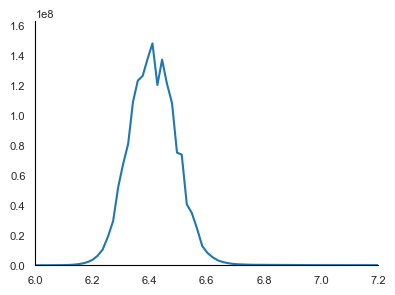

In [53]:
pmz = 447.125214 # the precursor you want to extract
# creating EIC
rt_list, intensity_list = ff.get_EIC_list(ms1, pmz)
ff.EIC(rt_list, intensity_list, rt_start=6, rt_end = 7.2)
# rt_start: zoomed in rt_start
# rt_end: zoomed in rt_end
# vlines_location_1/ vlines_location_2: 2 sets of locations you want to put a vertical line on (list is needed)
# savepath: optional, if you want to save a publication grade figure, please provide full length and end with .png